### Author: Roberto Mendoza
### Date: 03/03/2020


In [1]:
## Install package 

using Random   # for random seeds

#import Pkg; Pkg.add("CairoMakie")
using CairoMakie  # for density plot 

using Statistics 
#import Pkg; Pkg.add("Plots")
#import Pkg; Pkg.add("Distributions")
using Distributions


(process:20300): GLib-GIO-WARNING **: 14:13:56.107: Unexpectedly, UWP app `Evernote.Evernote_10.31.6.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


## 1.0 RCT application Polio  vaccination 

In [2]:
NV = 200745 # number of vaccinated (treated)
NU = 201229 # number of unvaccinated (control)
RV= 33/NV  # average outcome for vaccinated
RU =115/NU  # average outcome for unvaccinated
VE = (RU - RV)/RU # vaccine efficacy

0.7123516206478694

In [3]:
## Incidence per 100000

n = 100000

IncidenceRV = RV*n
IncidenceRU = RU*n

#Treatment effect - estimated reduction in incidence of polio per 100000 people

ATE_hat = n*(RV-RU)

println("Incidence per 100000 among treated: ", round(IncidenceRV; digits =4))

println("Incidence per 100000 among untreated: ", round(IncidenceRU; digits =4))

println("Estimated ATE of occurances per 100,000 is: ", round(ATE_hat; digits =4))

Incidence per 100000 among treated: 16.4388
Incidence per 100000 among untreated: 57.1488
Estimated ATE of occurances per 100,000 is: -40.7101


In [4]:
# outcomes (RV, RU) are Bernoulli
# variance, standard deviation and confidence interval of ATE 

var_RV = RV*(1-RV)/NV
var_RU = RU*(1-RU)/NU

var_ATE_hat  = n^2*(var_RV+var_RU)

std_ATE_hat = sqrt(var_ATE_hat)

println("Standard deviation for ATE is:  ", round(std_ATE_hat; digits =4))



Standard deviation for ATE is:  6.0474


In [5]:
# Confidence interval 

CI_ATE_hat =[ round(ATE_hat - 1.96*std_ATE_hat; digits = 4), round(ATE_hat + 1.96*std_ATE_hat; digits = 4)]

println("95% confidence interval of ATE is $CI_ATE_hat")

println("Overall VE is: " , round(VE; digits =4))

95% confidence interval of ATE is [-52.563, -28.8571]
Overall VE is: 0.7124


In [6]:
# Confidence interval based on approximate bootstrap

# Monte Carlo draws

Random.seed!(1)

B = 10000 #  number of boostraps
RVs = RV*ones(Float16, B)  + randn(B)*sqrt(var_RV)
RUs = RU*ones(Float16, B)  + randn(B)*sqrt(var_RU)
VEs= (RUs - RVs)./RUs


10000-element Vector{Float64}:
 0.6817224261974857
 0.6953664347250816
 0.7531459258609844
 0.6867222213078893
 0.6165362111226124
 0.7817779666902431
 0.6333934469608703
 0.6556843828007883
 0.8379647737634552
 0.8132928763558297
 0.6864550692620768
 0.729847409124033
 0.6893974356034072
 ⋮
 0.7124512490775646
 0.743478827635636
 0.6243684604532374
 0.7093989620521691
 0.7272183082401089
 0.588658896827336
 0.6917235071731522
 0.7243046193192478
 0.7552945654793395
 0.753296520825968
 0.727182181643485
 0.8022899199587447

two-sided 95% confidence interval of VE is [0.59, 0.8179]


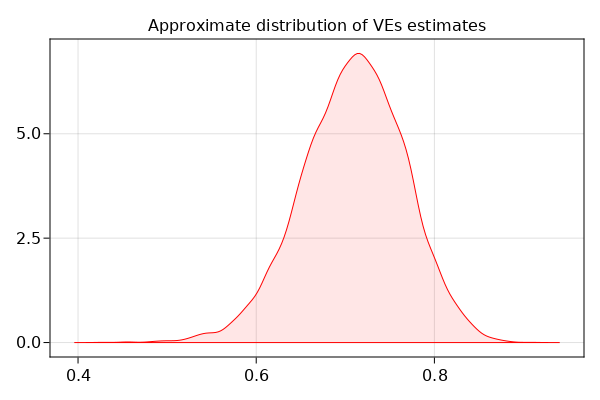

In [7]:
## Confidence interval of VEs

CI_VE = [round(quantile!(VEs, 0.025); digits = 4 ), round(quantile!(VEs, 0.975); digits = 4)]

println("two-sided 95% confidence interval of VE is $CI_VE")

## Approximate distribution of VEs estimates 

f = Figure(resolution = (600, 400))
Axis(f[1,1], title = "Approximate distribution of VEs estimates ")
    
density!(VEs, color = (:red, 0.1), strokecolor = :red, strokewidth = 1, strokearound = true, bandwidth = 0.008257) 

f


## 2.0 Pfizer/BNTX Covid-19 RCT application

In [9]:
# define inputs 

NV =  19965; # number vaccinated
NU =  20172; # number unvaccinated
RV = 9/NV; # average outcome for vaccinated
RU = 169/NU; # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy


In [10]:
## Incidence per 100000

n = 100000

IncidenceRV = RV*n
IncidenceRU = RU*n

#Treatment effect - estimated reduction in incidence of polio per 100000 people

ATE_hat = n*(RV-RU)

println("Incidence per 100000 among treated: ", round(IncidenceRV; digits =4))

println("Incidence per 100000 among untreated: ", round(IncidenceRU; digits =4))

println("Estimated ATE of occurances per 100 000 is: ", round(ATE_hat; digits =4))

Incidence per 100000 among treated: 45.0789
Incidence per 100000 among untreated: 837.795
Estimated ATE of occurances per 100 000 is: -792.7161


In [11]:
# outcomes (RV, RU) are Bernoulli
# variance, standard deviation and confidence interval of ATE 

var_RV = RV*(1-RV)/NV
var_RU = RU*(1-RU)/NU

var_ATE_hat  = n^2*(var_RV+var_RU)

std_ATE_hat = sqrt(var_ATE_hat)

println("Standard deviation for ATE is:  ", round(std_ATE_hat; digits =4))


Standard deviation for ATE is:  65.9102


In [12]:
# Confidence interval 

CI_ATE_hat =[ round(ATE_hat - 1.96*std_ATE_hat; digits = 4), round(ATE_hat + 1.96*std_ATE_hat; digits = 4)]

println("95% confidence interval of ATE is $CI_ATE_hat")

println("Overall VE is: " , round(VE; digits =4))

95% confidence interval of ATE is [-921.9, -663.5322]
Overall VE is: 0.9462


### 2.1 Approximate bootstrap to find the VE confidence interval

In [13]:
Random.seed!(1)

B = 10000 #  number of boostraps
RVs = RV*ones(Float16, B)  + randn(B)*sqrt(var_RV)
RUs = RU*ones(Float16, B)  + randn(B)*sqrt(var_RU)
VEs= (RUs - RVs)./RUs


10000-element Vector{Float64}:
 0.9408814093514811
 0.9407141481447149
 0.9583954955606354
 0.9418011045721292
 0.9195806666751577
 0.9735151090522808
 0.9324119521198911
 0.9283966354436475
 0.9959369160363154
 0.9806489086264251
 0.9399270593044702
 0.9558969100456748
 0.9398759241059838
 ⋮
 0.9572265468704411
 0.9589555046200413
 0.9254816573864182
 0.9433292399034574
 0.9494612927672281
 0.9006061197052284
 0.9342904269034605
 0.9500620084283901
 0.9592797266834576
 0.9541960000272378
 0.9499975261585338
 0.9728994198085604

two-sided 95% confidence interval of VE is [0.9081, 0.9817]


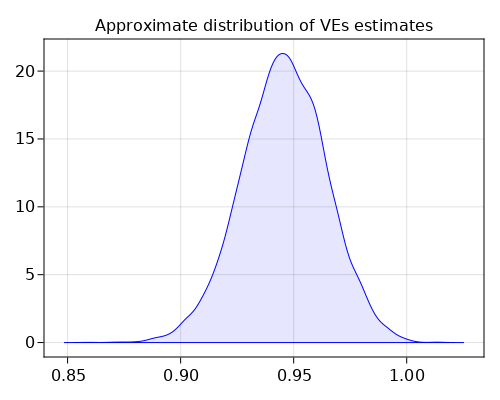

In [14]:
## Confidence interval of VEs

CI_VE = [round(quantile!(VEs, 0.025); digits = 4 ), round(quantile!(VEs, 0.975); digits = 4)]

println("two-sided 95% confidence interval of VE is $CI_VE")

## Approximate distribution of VEs estimates 

f = Figure(resolution = (500, 400))
Axis(f[1,1], title = "Approximate distribution of VEs estimates ")
    
density!(VEs, color = (:blue, 0.1), strokecolor = :blue, strokewidth = 1, strokearound = true) 

f

## 3.0 Overall effectiveness of the vaccine for the two groups (treatment and control) that are 65 or older

In [15]:
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

println("Overall VE is: " , round(VE; digits =4))

var_RV = RV*(1-RV)/NV
var_RU = RU*(1-RU)/NU

Overall VE is: 0.9471


1.1433299694990984e-6

### 3.1  Approximate bootstrap to find the VE confidence interval

In [17]:
Random.seed!(1)

B = 10000 #  number of boostraps

RVs = RV*ones(Float16, B)  + randn(B)*sqrt(var_RV) + 10^(-10)*ones(Float16, B) 
RUs = RU*ones(Float16, B)  + randn(B)*sqrt(var_RU) + 10^(-10)*ones(Float16, B) 
VEs= (RUs - RVs)./RUs



10000-element Vector{Float64}:
 0.9286374701019094
 0.9306318821603504
 0.9807062047067295
 0.932227928439073
 0.8497213956232972
 1.0341633458705015
 0.8826086276184276
 0.8908920202231071
 1.1204683874016654
 1.0436392904285337
 0.9269669930323389
 0.978832510418485
 0.9274269094457963
 ⋮
 0.9941031787120717
 0.9865853448694472
 0.8630160479950865
 0.939002630393595
 0.9561668577648301
 0.8166249965881008
 0.9157406832836444
 0.9583524341261762
 0.983253521851282
 0.9668034744043027
 0.9578251425652174
 1.0144231014448826

two-sided  95% confidence interval of VE is [0.8162, 1.0532]
one side 95% confidence interval of VE is [0.8422, 1.0]


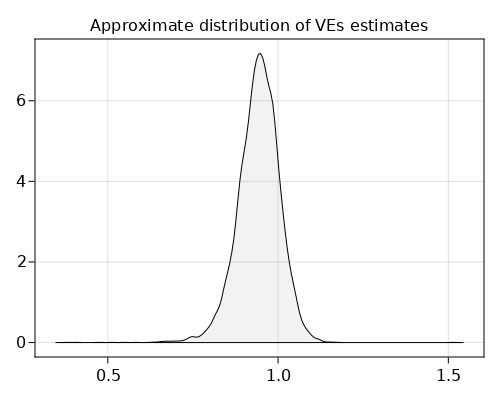

In [18]:
## Confidence interval of VEs

CI_VE = [round(quantile!(VEs, 0.025); digits = 4 ), round(quantile!(VEs, 0.975); digits = 4)]

OneSidedCI_VE = [round(quantile!(VEs, 0.05); digits = 4 ), 1]

println("two-sided  95% confidence interval of VE is $CI_VE")

println("one side 95% confidence interval of VE is $OneSidedCI_VE")

## Approximate distribution of VEs estimates 

f = Figure(resolution = (500, 400))
Axis(f[1,1], title = "Approximate distribution of VEs estimates ")
    
density!(VEs, color = (:gray, 0.1), strokewidth = 1, strokearound = true) 

f

### Let's try the parametric boostrap next, using the fact that the outcome is Bernouli.

In [19]:
NV =  3239+805;
NU =  3255+812;
RV = 1/NV;
RU = (14+5)/NU;
VE = (RU - RV)/RU;

println("Overall VE is: " , round(VE; digits =4))

Overall VE is: 0.9471


In [21]:
Random.seed!(1)

B = 10000 #  number of boostraps
VEs= (RUs - RVs)./RUs

RVs = rand(Binomial(NV,RV), B)
RUs = rand(Binomial(NU,RU), B)
VEs= (RUs - RVs)./RUs

10000-element Vector{Float64}:
 0.95
 1.0
 1.0
 1.0
 0.9375
 1.0
 0.8333333333333334
 0.8666666666666667
 0.9473684210526315
 0.8235294117647058
 1.0
 0.9375
 0.95
 ⋮
 0.7857142857142857
 0.9
 0.95
 0.9444444444444444
 0.9230769230769231
 1.0
 0.9333333333333333
 0.8947368421052632
 0.8888888888888888
 1.0
 0.9473684210526315
 0.8888888888888888

two-sided 95% confidence interval of VE is [0.8, 1.0]
one sided 95% confidence interval of VE is [0.8333, 1.0]


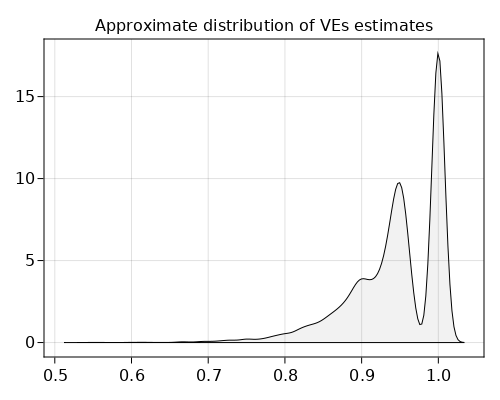

In [22]:
## Confidence interval of VEs

CI_VE = [round(quantile!(VEs, 0.025); digits = 4 ), round(quantile!(VEs, 0.975); digits = 4)]

OneSidedCI_VE = [round(quantile!(VEs, 0.05); digits = 4 ), 1]

println("two-sided 95% confidence interval of VE is $CI_VE")

println("one sided 95% confidence interval of VE is $OneSidedCI_VE")

## Approximate distribution of VEs estimates 

f = Figure(resolution = (500, 400))
Axis(f[1,1], title = "Approximate distribution of VEs estimates ")
    
density!(VEs, color = (:gray, 0.1), strokewidth = 1, strokearound = true) 

f

## 4.0 Exact Binomial Test Inversion